## Decay Rates

In [1]:
cd '/home/dpirvu/project/paper_prefactor/'

/home/dpirvu/project/paper_prefactor


In [2]:
import os,sys
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/paper_prefactor/bubble_codes/')
#sys.path.append('/home/dpirvu/project/paper_prefactor/bubble_codes_older/')
#sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline

['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/home/dpirvu/DarkPhotonxunWISE/hmvec-master', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/paper_prefactor/bubble_codes/']
['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/home/dpirvu/DarkPhotonxunWISE/hmvec-master', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/exte

In [3]:
case = 'minus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general


0.23030938081773686
sigma 0 [0.2501, 0.25]
sigma 1 [0.1842, 0.1838]
sigma 2 [-0.0707, -0.0717]
sigma 3 [-0.6128, -0.6151]
0.2661087871323195
sigma 0 [0.2501, 0.25]
sigma 1 [0.1593, 0.1589]
sigma 2 [-0.2034, -0.2047]
sigma 3 [-0.9955, -0.9989]
0.3415271460137985
sigma 0 [0.2501, 0.25]
sigma 1 [0.0904, 0.0898]
sigma 2 [-0.5883, -0.5906]
sigma 3 [-2.1458, -2.1527]


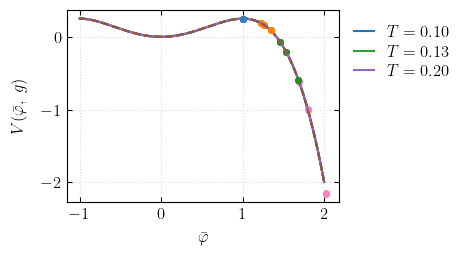

In [4]:
if True:
    philist = np.linspace(-1, 2, 1000)
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

    Vunbounded = lambda x: 0.5*x**2. - 0.25*x**4.# + x**6. * 1e-4
    for tmp in range(len(tempList)):
        temp, m2, sigmafld = get_model(*general, tmp)
        maxSim = (1000 if tmp == 0 else 2000)
        print(sigmafld)
        exp_params = np.asarray([nLat, m2, temp])

        ax.plot(philist, V(philist), label=r'$T={:.2f}$'.format(temp))
        #ax.plot(sigmafld, V(sigmafld), 'go', ms=2)
        ax.plot(philist, Vunbounded(philist), ls='--')
        cych = cycle(allcolors)
        for nn in np.linspace(0, 3, 4):
            col=next(cych)
            plt.plot(right_Vmax + nn*sigmafld, V(right_Vmax + nn*sigmafld), 'o', color=col, ms=4)
            plt.plot(right_Vmax + nn*sigmafld, Vunbounded(right_Vmax + nn*sigmafld), 'o', color=col, ms=4)

            nums = [V(right_Vmax + nn*sigmafld), Vunbounded(right_Vmax + nn*sigmafld)]
            print('sigma', int(nn), [round(ii, 4) for ii in nums])
  #  ax.set_ylim((-.1, .5))
    ax.set_xlabel(r'$\bar{\varphi}$')
    ax.set_ylabel(r'$V(\bar{\varphi},\; g)$')
    beautify(ax, bb=(1,1), times=-100)
    plt.savefig('./plots/potential.pdf')
    plt.show()


In [98]:
tmp = 0
maxSim = (1000 if tmp == 0 else 2000)
temp, m2, sigmafld = get_model(*general, tmp)
exp_params = [nLat, m2, temp]
print('Experiment', exp_params)

sim = 10
path2sim = sim_location(*exp_params, sim)
#path2bubblesim = bubble_sim_location(*exp_params, sim)
path2cleansim = clean_sim_location(*exp_params, sim)

decays_times = np.load(decaytimes4real_file(*exp_params, minSim, maxSim, nTimeMAX), allow_pickle=True)
simind = np.argwhere(decays_times[:,0] == sim)[0,0]
tdecay = decays_times[simind,1]
tdecay = tdecay
print(tdecay)

Experiment [2048, 0.85, 0.1]
45764


In [99]:
tdecay, outcome, initcond, real, prebubble, bubble = get_realisation(nLat, nTimeMAX, path2sim)
real[np.isnan(real)] = 0.

nC, nT, nN = np.shape(real)
fld, mom = real[0], real[1]
duration = nT
tlist = np.arange(duration) * 1024

In [121]:
realbub = np.load(path2cleansim, allow_pickle=True)

nC, nT, nN = np.shape(realbub)
fldbub, mombub = realbub[0], realbub[1]
startt    = (tdecay // 1024) * 1024
tlistbub  = np.arange(startt, startt+nT)

In [125]:
%run './bubble_codes/plotting.py'

<Figure size 640x480 with 0 Axes>

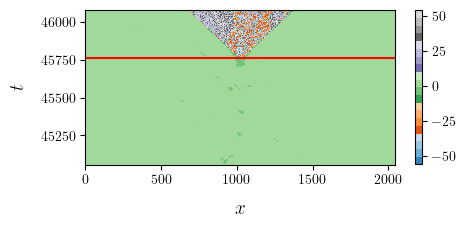

In [145]:
ax = simple_imshow(realbub, np.arange(nN), tlistbub, ret=True)
ax.axhline(tdecay - 3/dx, color='r')
plt.show()

In [102]:
KEN_real, GEN_real, PEN_real, TEN_real = get_simulation_energy(real, nLat, lenLat, V)

KEN_real_bub, GEN_real_bub, PEN_real_bub, TEN_real_bub = get_simulation_energy(realbub, nLat, lenLat, V)

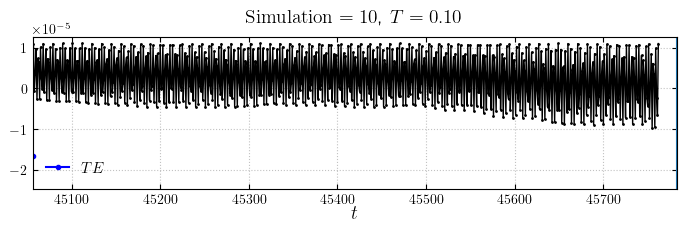

In [143]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))

#ax.plot(tlist[tlist < tdecay], KEN_real[tlist < tdecay]/KEN_real[0] - 1., label=r'$KE$',  ls='-', color='g')
#ax.plot(tlist[tlist < tdecay], GEN_real[tlist < tdecay]/GEN_real[0] - 1., label=r'$GE$',  ls='-', color='r')
#ax.plot(tlist[tlist < tdecay], PEN_real[tlist < tdecay]/PEN_real[0] - 1., label=r'$PE$',  ls='-', color='y')
ax.plot(tlist[tlist < tdecay-3/dx], TEN_real[tlist < tdecay-3/dx]/TEN_real[0] -1., label=r'$TE$',  ls='-', color='b', ms=3, marker='o')

#ax.plot(tlistbub[tlistbub < tdecay], PEN_real_bub[tlistbub < tdecay]/PEN_real_bub[0] - 1., ls='-', lw=1, color='y', ms=1, marker='o')
#ax.plot(tlistbub[tlistbub < tdecay], GEN_real_bub[tlistbub < tdecay]/GEN_real_bub[0] - 1., ls='-', lw=1, color='r', ms=1, marker='o')
#ax.plot(tlistbub[tlistbub < tdecay], KEN_real_bub[tlistbub < tdecay]/KEN_real_bub[0] - 1., ls='-', lw=1, color='g', ms=1, marker='o')
ax.plot(tlistbub[tlistbub < tdecay-3/dx], TEN_real_bub[tlistbub < tdecay-3/dx]/TEN_real_bub[0] - 1., ls='-', lw=1, color='k', ms=1, marker='o')

ax.axvline(tdecay)
ax.axvline(tdecay-2/dx)
ax.set_xlabel(r'$t$')
ax.set_xlim((tlistbub[0], tdecay-2/dx))#tlistbub[-1]))
#ax.set_xscale('log')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim) + r', $T={:.2f}$'.format(temp))
beautify(ax, times=-70)
plt.tight_layout()
plt.show()

In [146]:
bubbleList, velocitesList, instantonList, tmpList, fldcritList, tcritList, encritList = [], [], [], [], [], [], []
for tmp in [0,2]:
    case = 'minus'
    general = get_general_model(case)
    tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general
    maxSim = (1000 if tmp == 0 else 2000)
    temp, m2, sigmafld = get_model(*general, tmp)

    exp_params = [nLat, m2, temp]
    print('Experiment', exp_params)

    bubbleList.append(np.load(average_file(*exp_params)))
    velocitesList.append(np.load(velocities_file(*exp_params)))
    instantonList.append(np.load(ansol_instanton_file(*exp_params)))
    tmpList.append(tmp)
    fldcritList.append(np.load(critfield_file(*exp_params)))
    tcritList.append(np.load(crittimes_file(*exp_params)))
    encritList.append(np.load(critenerg_file(*exp_params)))


Experiment [2048, 0.85, 0.1]
Experiment [2048, 0.7, 0.2]


In [8]:
getps = False
if getps:
    clls = allcolors
    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        maxSim = (1000 if tmp == 0 else 2000)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot
        tslist = np.array([0,5,20,46,72,101])

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        tlist, PSfld1 = ALL_powspec1[0][tslist], ALL_powspec1[1][:, find, tslist, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][tslist], ALL_powspec2[1][:, find, tslist, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
        plt.axhline(1., ls='-', color='k')
        for tind, tt in enumerate(reversed(tlist)):
            tind = len(tlist) - 1 - tind
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)
            curve/=pspec(lamb, phi0, temp)[aa:bb]

            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

        for tind, tt in enumerate(reversed(tlist)):
            tind = len(tlist) - 1 - tind
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)
            curve/=pspec(lamb, phi0, temp)[aa:bb]

            lab = r'${:.0f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),0))
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=clls[tind], label=lab)

        del PSfld1, PSfld2

        beautify(ax)
        h, l = ax.get_legend_handles_labels() # Extracting handles and labels
        h = h[::-1]
        l = l[::-1]
        handles = [plt.plot([],marker="", ls="")[0]]*2 + h
        labels = ['', r'$m\,t:$'] + l  # Merging labels
        leg = ax.legend(handles, labels, ncol=4, frameon=False, loc=4, labelspacing=0.3, columnspacing=0.5)#._legend_box.align='left'

        ax.set_xlim((klist[aa]/np.sqrt(m2(lamb))*0.9, klist[bb-1]/np.sqrt(m2(lamb))*1.1))
        ax.set_xscale('log')
        ax.set_xlabel(r'$k/m$')
        ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 / \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


In [9]:
if getps:
    savemeff = np.zeros((4))
    cls = cycle(allcolors[:4])
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        maxSim = (1000 if tmp == 0 else 2000)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=2.2)][-1]
        aa, bb = 1, indmax#knyq//5
        ta, tb = -50, -1
        
        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, ta:tb, aa:bb], ALL_powspec1[1][:, 1, ta:tb, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, ta:tb, aa:bb], ALL_powspec2[1][:, 1, ta:tb, aa:bb]
        del ALL_powspec2

        avPSfld = np.nanmean(np.nanmean(np.concatenate((PSfld1, PSfld2), axis=0), axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(np.concatenate((PSmom1, PSmom2), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2, PSmom1, PSmom2
        curve   = (avPSmom/avPSfld)

        w2m      = lambda ks, m: ks**2. + m**2.
        pofk     = lambda ks, m: w2m(ks, m)
        pred_fit = lambda x, data: sco.curve_fit(pofk, x, data, p0=0.09)[0]

        fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
        col = next(cls)
        #lab1 = r'$\rm Data$'
        lab1 = r'${:.1f}$'.format(temp/np.sqrt(m2(lamb)))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=col, label=lab1)

        best_ps = pred_fit(klist[aa:bb], curve)
        savemeff[tmp] = best_ps[0]
     #   lab2 = r'$m_{\rm eff}=$'+r'${:.4f}$'.format(*best_ps)
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk(klist[aa:bb], *best_ps), color='k', ls=':', lw=1)#, label=lab2)

        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk(klist[aa:bb], np.sqrt(m2(lamb))), ls='-', lw=1, color='k')#, lab=lab0)
        ax.set_yscale('log')
        ax.set_xscale('log')
        #ax.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        beautify(ax, ttl=r'$T/m:$', loc=2)
        plt.show()

    print(savemeff)

In [10]:
if getps:
    fig, ax = plt.subplots(1,1, figsize = (4,3))
    cls = cycle(allcolors[:4])
    for zi, stuff in enumerate(np.array(view_meff_func_t)):
        col = next(cls)
        plt.plot(stuff[:,0]*dx/lenLat, stuff[:,1], label=r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb))), color=col)
        plt.axhline(savemeff[zi], color=col, ls=':')
    plt.ylabel(r'$m_{\rm eff}(t)$')
    plt.xlabel(r'$t/L$')
    beautify(ax, ttl=r'$T/m:$', ncol=2)
    plt.tight_layout()
    plt.savefig('./plots/masses_tevol.pdf')
    plt.show()

In [11]:
if getps:
    fig, ax = plt.subplots(1, 4, figsize = (12,3.), gridspec_kw={'width_ratios': [2.,2.,2.,1.]})
    for tmp in range(len(tempList)):
        if tmp!=3: continue
        col = allcolors[tmp]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=3.3)][-1]
        # modes to plot:
        aa, bb = 0, indmax
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, am:bm, aa:bb], ALL_powspec1[1][:, 1, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, am:bm, aa:bb], ALL_powspec2[1][:, 1, am:bm, aa:bb]
        del ALL_powspec2

        avPSfld = np.nanmean(np.nanmean(np.concatenate((PSfld1, PSfld2), axis=0), axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(np.concatenate((PSmom1, PSmom2), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2, PSmom1, PSmom2
        curve   = (avPSmom/avPSfld)

        w2m     = lambda ks, m: ks**2. + m**2.
        pofk_w2 = lambda ks, m: w2m(ks, m)

        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], np.sqrt(m2(lamb)))/m2(lamb), ls='-', lw=1, color='k')#, label=lab0)

        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve/m2(lamb), ls='-', color=col)#, label=lab1)

        lab2 = r'$m_{\rm eff}/m=$'+r'${:.2f}$'.format(savemeff[tmp]/np.sqrt(m2(lamb))) + r'$\newline$'
        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], savemeff[tmp])/m2(lamb), color='k', ls=':', lw=1, label=lab2)
        ax[0].legend(ncol=1, frameon=False, loc=2, handlelength=1)

        norml       = 1./ phi0 / np.sqrt(2. * lenLat)
        w2m_fld     = lambda ks, msq: ks**2. + msq
        pofk0_fld   = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk_fld    = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1_fld = lambda ks, te: np.abs(pofk_fld(ks, savemeff[tmp]**2., te))**2.
        f_pred2_fld = lambda ks, te: np.abs(pofk0_fld(ks, m2(lamb), te))**2.

        # modes to plot:
        aa, bb = 0, 10*indmax
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0], ALL_powspec1[1][:, :, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0], ALL_powspec2[1][:, :, am:bm, aa:bb]
        del ALL_powspec2
        curve_fld = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,0], PSfld2[:,0]), axis=0), axis=1), axis=0)
        curve_mom = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,1], PSfld2[:,1]), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2

        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2_fld(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_fld, ls='-', color=col)#, label=lab1)

        ax[1].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1_fld(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                             f_pred1_fld(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                                             linewidth=0, color=col, alpha=0.2)
        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1_fld(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        norml   = 1./ phi0 / np.sqrt(2. * lenLat)
        pofk0   = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk    = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1 = lambda ks, te: np.abs(pofk(ks, savemeff[tmp]**2., te))**2.
        f_pred2 = lambda ks, te: np.abs(pofk0(ks, m2(lamb), te))**2.

        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls='-', color=col)#, label=lab1)

        ax[2].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                             f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                                             linewidth=0, color=col, alpha=0.2)
        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        
        l0, = ax[3].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        l1, = ax[3].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls='-', color=col)#, label=lab1)

        l2  = ax[3].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                                 f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                 linewidth=0, color=col, alpha=0.2)
        l22,= ax[3].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        lab0 = r'${\rm Initial \; conditions \;}$'
        lab1 = r'${\rm Late \; time \; data \;}$'
        lab2 = r'$T_{\rm eff}/m=$'+r'${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(save_teff_from_fld[tmp]/np.sqrt(m2(lamb)), \
                                     (save_teff_from_mom_upper_bound[tmp] - save_teff_from_fld[tmp])/np.sqrt(m2(lamb)), \
                                     (save_teff_from_fld[tmp] - save_teff_from_mom_lower_bound[tmp])/np.sqrt(m2(lamb)))
        leg = ax[3].legend([l0, l1, (l2, l22), ], [lab0, lab1, lab2], title=r'$T/m={:.1f}$'.format(temp/np.sqrt(m2(lamb))), \
                           ncol=1, frameon=False, handlelength=1, loc='center')

        ax[0].set_ylabel(r'$\omega_k^2/m^2$')
        ax[1].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax[2].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')

        for ai, aa in enumerate(ax.flatten()[:3]):
            aa.axvline(klist[indmax+1]/np.sqrt(m2(lamb)), color='k', ls='-', lw=0.5)
            aa.grid(which='both', ls=':', color='lightgray', alpha=0.5)
            aa.tick_params(direction='in', which='both', top=True, right=True)
            if ai>0:
                aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            aa.set_xscale('log')
            #aa.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
            aa.set_xlabel(r'$k/m$')
            aa.xaxis.set_label_coords(0.5, -0.13)
            aa.yaxis.set_label_coords(-0.1, 0.5)
            aa.xaxis.label.set_color('k')        #setting up X-axis label color to yellow
            aa.yaxis.label.set_color('k')          #setting up Y-axis label color to blue
            aa.tick_params(axis='x', colors='k')    #setting up X-axis tick color to red
            aa.tick_params(axis='y', colors='k')  #setting up Y-axis tick color to black
            aa.spines['left'].set_color('k')        # setting up Y-axis tick color to red
            aa.spines['right'].set_color('k')        # setting up Y-axis tick color to red
            aa.spines['top'].set_color('k')         #setting up above X-axis tick color to red
            aa.spines['bottom'].set_color('k')         #setting up above X-axis tick color to red

        a = ax[0].get_yticks().tolist()[::2]
        ax[0].set_yticks(a)
        b = [r'${:.0f}$'.format(int(al)) for al in a]
        ax[0].set_yticklabels(b)

        ax[3].set_xlim(-1.1,-1.)
        ax[3].set_ylim(-1.1,-1.)
        ax[3].grid(which='both', ls=':', color='white')
        ax[3].tick_params(direction='in', which='both', top=None, right=None, bottom=None, left=None)
        ax[3].spines['top'].set_visible(False)
        ax[3].spines['right'].set_visible(False)
        ax[3].spines['bottom'].set_visible(False)
        ax[3].spines['left'].set_visible(False)
        ax[3].get_xaxis().set_ticks([])
        ax[3].get_yaxis().set_ticks([])

        plt.tight_layout()
        plt.savefig('./plots/flat_bestfit_masses.pdf')
        plt.show()


In [12]:
case = 'minus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general
maxSim = (1000 if tmp == 0 else 2000)

ecrit = np.zeros((len(tmpList)))
for ii, average_bubble in enumerate(reversed(bubbleList)):
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]
    tmp = tmpList[ii]

    instanton = np.load(ansol_instanton_file(*exp_params))
    gradinst  = (np.roll(instanton,-1) - instanton)/dx
    ecrit[tmp] = dx * np.sum(V(instanton) + 0.5*gradinst**2., axis=0)


def exp_bounce(x, a, b):
    return a * np.sqrt(b/x) * np.exp(-b/x)

def second_exp_bounce(x, a, b):
    Ecrit = ecrit[0]
    Teff  = x*b
    return a * np.sqrt(Ecrit/Teff) * np.exp(-Ecrit/Teff)

def exp_prefactor(x, a):
    Ecrit = ecrit[0]
    return a * np.sqrt(Ecrit/x) * np.exp(-Ecrit/x)

get_best_bounce        = lambda x, y: sco.curve_fit(exp_bounce, x, y)
get_best_prefactor     = lambda x, y: sco.curve_fit(exp_prefactor, x, y)
get_second_best_bounce = lambda x, y: sco.curve_fit(second_exp_bounce, x, y)


IndexError: index 2 is out of bounds for axis 0 with size 2

1000
2000


IndexError: index 2 is out of bounds for axis 0 with size 2

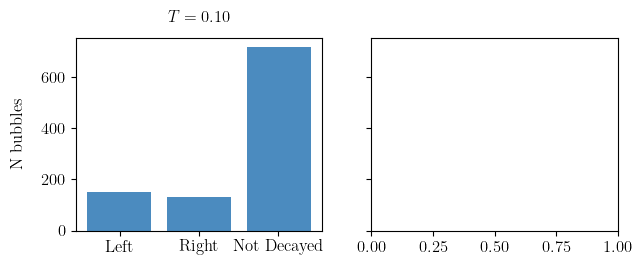

In [13]:
# Classify decays
fig, ax = plt.subplots(1, 2, figsize = (7,2.5), sharey=True)
cols=cycle(allcolors)
for tmp in tmpList:
    temp, m2, sigmafld = get_model(*general, tmp)
    maxSim = (1000 if tmp == 0 else 2000)
    exp_params = [nLat, m2, temp]

    decayed_sims = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))

    outcomes = decayed_sims[:,1]; print(len(outcomes))

    labs = r'$T={:.2f}$'.format(temp)
    ax[tmp].hist(outcomes, density=False, bins=3, rwidth=0.8, color=next(cols), alpha=0.9, linewidth=0.5, align='mid')

    a = [0.34, 1., 1.66]
    b = [r'${\rm Left}$', r'${\rm Right}$', r'${\rm Not \ Decayed}$']
    ax[tmp].set_xticks(a)
    ax[tmp].set_xticklabels(b)

    ax[0].set_ylabel(r'$\rm N \; bubbles$')
    ax[tmp].set_title(labs)
beautify(ax, times=-70)
plt.tight_layout()
plt.savefig('./plots/vacuum_choice.pdf')
plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


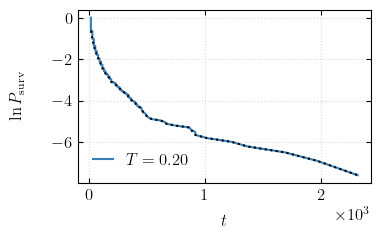

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (4,2.6))
gammas1 = np.zeros((len(tempList), 2))
cls = cycle(allcolors[:len(tempList)])

for tmp in [2]:
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]
    maxSim = (1000 if tmp == 0 else 2000)

    decayed_sims = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    ndcys = len(decay_times)

#    coords_decayed = (decayed_sims[:,1]!=2)
#    times_decayed_list = decay_times[coords_decayed]
#    times_undecayed_list = decay_times[~coords_decayed]
#    print(ndcys, len(times_decayed_list), len(times_undecayed_list), len(times_decayed_list)+len(times_undecayed_list))

#    lmmax = 7500/dx


    decay_times = np.sort(decay_times[:,1])
 #   decay_times = decay_times[decay_times < lmmax]

    col = next(cls)
    ax.plot(decay_times*dx, np.log(survive_prob(decay_times, ndcys)), color=col, ls='-', label=r'$T={:.2f}$'.format(temp))
    ax.plot(decay_times*dx, np.log(f_surv(decay_times, ndcys)), color='k', ls=':')

#ax.set_xlim(0, lmmax*dx)
#ax.axvline(7500, ls=':', color='darkgray')
#ax.set_ylim(-0.31, 0.01)
ax.set_ylabel(r'$\ln P_{\rm surv}$')
ax.set_xlabel(r'$t$')

beautify(ax, loc=3, times=-120)
ax.ticklabel_format(axis='x', style='scientific', scilimits=[-1.,0.])
fig.tight_layout()
plt.savefig('./plots/decay_rate_and_surv_fraction.pdf')
plt.show()

In [22]:
Times = np.array([dx * decay_times])

#Psurv = np.zeros((1, len(decay_times)))
#Psurv[0] = survive_prob(decay_times, ndcys)
M = 1
#t_l = np.array([np.linspace(0,nTimeMAX,ndcys)])
#t_l = Times
TempList = np.array([temp])
nTimeMAX = 262144

In [23]:
t_points = 10000
t_l = [None]*M
Psurv = np.zeros((M,t_points))
for j in range(M):
    t_l[j] = np.linspace(0, nTimeMAX*dx - 0.1, t_points)
    for i in range(0,len(Times[j])):
        if Times[j][i] == 0:
            Times[j][i] = TimeOfSimList[j]
    Times[j].sort()
for j in range(M):
    for i in range(0,t_points):
        Psurv[j,i] = (Times[j]>t_l[j][i]).sum()/len(Times[j])


In [24]:
from scipy.optimize import curve_fit


In [25]:
L = lenLat
N = nLat
DT = dx
print(dx)

0.048828125


In [29]:
""" Split into vertical segments, approximate each segment by a line """

log_Psurv = np.log(Psurv)

Offset_t = 0                         # Exclude region t < Offset_t
log_P_threshold = 0.15               # Max decay fraction
N_segments = 4
MAX_t = 2000#nTimeMAX*dx-1; print(MAX_t)

Gamma_t_list        = [None]*M
Gamma_t_errors_list = [None]*M
time_points         = [None]*M
time_end_points     = [None]*M
num_of_events       = [None]*M
init_amps           = [None]*M

for i in range(M):
    b        = []
    b_s      = []
    amp      = []
    t_middle = []
    t_endpts = []
    num_i    = []

    log_P_min = -log_Psurv[i][t_l[i]>Offset_t][0]
   # log_P_max = -log_Psurv[i][t_l[i]<=MAX_t][-1]
    log_P_max = log_P_threshold

    Delta_P = (log_P_max - log_P_min)/N_segments
    print(log_P_max, log_P_min, Delta_P, len(log_Psurv[i]))

    for j in range(N_segments):
        ind = np.where((-log_Psurv[i] > log_P_min + j*Delta_P) & (-log_Psurv[i] < log_P_min + (j+1.)*Delta_P))[0]

        num = ( (Times[i] > t_l[i][ind[0]]) & (Times[i] < t_l[i][ind[-1]]) ).sum()
        num_i += [num]

        y1 = log_Psurv[i,ind[0]]
        y2 = log_Psurv[i,ind[-1]]
        t1 = t_l[i][ind[0]]
        t2 = t_l[i][ind[-1]]
        slope = -(y2-y1)/(t2-t1)

        t_middle += [(t1+t2)/2.]
        t_endpts += [[int(t1 / dx), int(t2 / dx)]]
        b   += [slope]
        b_s += [slope/np.sqrt(num)]
        amp += [[log_Psurv[i,ind[0]], log_Psurv[i,ind[-1]]]]

    num_of_events[i]       = np.array(num_i)
    Gamma_t_list[i]        = np.array(b)
    Gamma_t_errors_list[i] = np.array(b_s)
    time_points[i]         = np.array(t_middle)
    time_end_points[i]     = np.array(t_endpts)
    init_amps[i]           = np.array(amp)

0.15 -0.0 0.0375 10000


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: index 0 is out of bounds for axis 0 with size 0

1000 283 717 1000
2000 2000 0 2000


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


TypeError: object of type 'NoneType' has no len()

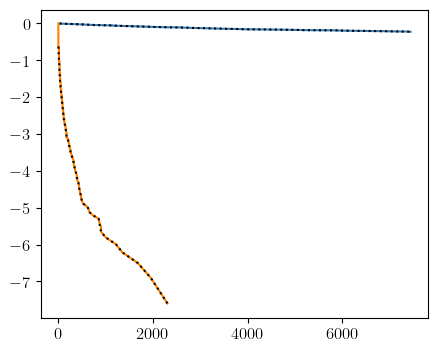

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (5,4))
gammas1 = np.zeros((len(tempList), 2))
cls = cycle(allcolors[:len(tempList)])

for tmp in tmpList:
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]
    maxSim = (1000 if tmp == 0 else 2000)

    decayed_sims = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    ndcys = len(decay_times)

    coords_decayed = (decayed_sims[:,1]!=2)
    times_decayed_list = decay_times[coords_decayed]
    times_undecayed_list = decay_times[~coords_decayed]
    print(ndcys, len(times_decayed_list), len(times_undecayed_list), len(times_decayed_list)+len(times_undecayed_list))

    lmmax = 7500/dx
   # lmmax = nTimeMAX#7500/dx

    decay_times = np.sort(times_decayed_list[:,1])
    decay_times = decay_times[decay_times < lmmax]

    col = next(cls)
    ax.plot(decay_times*dx, np.log(survive_prob(decay_times, ndcys)), color=col, ls='-', label=r'$T={:.2f}$'.format(temp))
    ax.plot(decay_times*dx, np.log(f_surv(decay_times, ndcys)), color='k', ls=':')

for ii in range(len(time_points[0])):
    plt.axvline(dx * time_end_points[0][ii][0], ls=':', color='darkgray')
    plt.axvline(dx * time_end_points[0][ii][1], ls=':', color='darkgray')

    print(time_end_points[0][ii][0])

   # amp = np.log(survive_prob(decay_times, ndcys))[(decay_times==time_end_points[0][ii][0])][0]
   # xs  = dx * np.arange(time_end_points[0][ii][0], time_end_points[0][ii][1], 10)
   # xs0 = xs - dx * time_end_points[0][ii][0]

   # plt.plot(xs, amp - Gamma_t_list[0][ii] * xs0, ls=':')

#ax.axvline(7500, ls=':', color='darkgray')
#ax.set_ylim(-0.31, 0.01)
ax.set_ylabel(r'$\ln P_{\rm surv}$')
ax.set_xlabel(r'$t$')

beautify(ax, loc=3, times=-120)
ax.ticklabel_format(axis='x', style='scientific', scilimits=[-1.,0.])
fig.tight_layout()
plt.savefig('./plots/decay_rate_and_surv_fraction.pdf')
plt.show()

In [31]:
""" Extrapolate the tilt of the lines to t=0 """

def log_Gamma_fit(t, a, b):
    return a - b*t


log_Gamma_at_zero, slope, log_Gamma_at_zero_error = np.zeros((3, M))

for i in range(M):
    params, cov = curve_fit(log_Gamma_fit, time_points[i][1:], np.log(Gamma_t_list[i][1:]), sigma=Gamma_t_errors_list[i][1:]/Gamma_t_list[i][1:], absolute_sigma=True)
    print(params)
    print(cov)
    log_Gamma_at_zero[i] = params[0]
    slope[i] = params[1]
    log_Gamma_at_zero_error[i] = np.sqrt(cov[0,0])


TypeError: 'NoneType' object is not subscriptable

In [32]:
""" Fit: sphaleron energy """

rf = 0
T0_inv=1./TempList[rf]
print(T0_inv)

def log_Gamma_th(T_inv, Es):
    return - Es * (T_inv - T0_inv)

param, cov = curve_fit(log_Gamma_th, 1./TempList, log_Gamma_at_zero - log_Gamma_at_zero[rf], \
                       sigma = np.sqrt(log_Gamma_at_zero_error**2. + log_Gamma_at_zero_error[rf]**2.)/2., absolute_sigma=True)

Es = param[0]
Es_error = np.sqrt(cov[0,0])

chi2 = 0
for i in range(M):
    a = log_Gamma_th(TempList[i]**(-1),Es)
    b = log_Gamma_at_zero[i]-log_Gamma_at_zero[rf]
    c = np.sqrt(log_Gamma_at_zero_error[i]**2+log_Gamma_at_zero_error[rf]**2)/2
    chi2 += ((a-b)/c)**2
chi2 /= M

print('energy:')
print(Es, Es_error, chi2)

5.0
energy:
1.0 inf nan


/home/dpirvu/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/home/dpirvu/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/home/dpirvu/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [33]:
""" Fit: prefactor """

Es_th = 4./3.
T_middle = 0.5*(TempList[0] + TempList[-1])
log_A_th = np.log(6. * L / np.pi * np.sqrt(Es_th / 2. / np.pi / T_middle))

def log_Gamma_th2(T_inv, log_A):
    return log_A - Es_th*T_inv

param, cov = curve_fit(log_Gamma_th2, np.array(TempList)**(-1), log_Gamma_at_zero, sigma=log_Gamma_at_zero_error, absolute_sigma=True)

log_A = param[0]
log_A_error = np.sqrt(cov[0,0])

chi2 = 0.
for i in range(M):
    a = log_Gamma_th2(TempList[i]**(-1),log_A)
    b = log_Gamma_at_zero[i]
    c = log_Gamma_at_zero_error[i]
    chi2 += ((a-b)/c)**2
chi2 /= M

print('log of Prefactor:')
print(log_A-np.log(L), log_A_error, chi2)
print('ratio:')
print(np.exp(log_A_th)/np.exp(log_A))

log of Prefactor:
-3.605170185988092 inf inf
ratio:
72.37212624207542


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


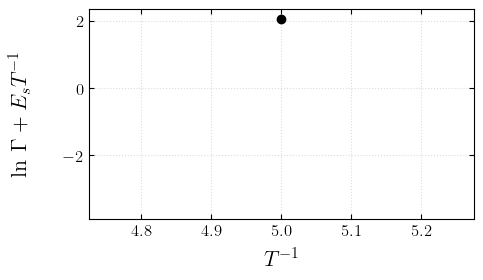

In [34]:
""" Plot Prefactor """

Tinv = np.linspace(TempList[0]**(-1), TempList[-1]**(-1), 1000)
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.errorbar(np.array(TempList)**(-1),log_Gamma_at_zero+Es_th*np.array(TempList)**(-1)-np.log(L),log_Gamma_at_zero_error, color='k', fmt='o', elinewidth=1, capsize=3)
ax.plot(Tinv, log_Gamma_th2(Tinv, log_A) + Es_th*Tinv - np.log(L), color='k')
plt.xlabel(r'$T^{-1}$',fontsize=16)
ax.set_ylabel(r'$\ln\: \Gamma+E_sT^{-1}$',fontsize=16)
#plt.text(1,1,r'$\ln \:A = -0.815\pm 0.032$',fontsize=14)
#plt.savefig('prefactor.pdf')
beautify(ax, times=-100)
plt.tight_layout()
plt.show()

/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


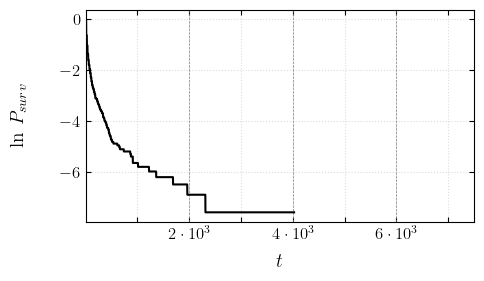

In [35]:
""" Plot survival probability: example """

t = np.linspace(0, 5000, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5,3))
plt.xlim((0,7500))
ax.set_xticks([1e3,2e3,3e3,4e3,5e3,6e3,7e3])
ax.set_xticklabels([None,r'$2\cdot 10^3$',None,r'$4\cdot 10^3$',None,r'$6\cdot 10^3$',None])
for tick in [2e3,4e3,6e3]:
    ax.axvline(x=tick, linestyle='dashed', linewidth=0.5, color='grey')

for i in [0]:
    imin = np.max(np.where(t_l[i]<6000))
    imax = np.max(np.where(t_l[i]<7500))
    a = (np.log(Psurv[i,imax])-np.log(Psurv[i,imin]))/1500
    b = np.log(Psurv[i,imax]) - a*7500
    x = np.linspace(0,7500,10000)
    ax.plot(t_l[i], np.log(Psurv[i,:]),'black')
    ax.plot(x, a*x+b, 'grey',linewidth=1)

plt.xlabel(r'$t$',fontsize=14)
ax.set_ylabel(r'$\ln\: P_{surv}$',fontsize=14)
beautify(ax, times=-100)
plt.tight_layout()
#plt.savefig('P_surv(t)_ex.pdf')
plt.show()

TypeError: 'NoneType' object is not subscriptable

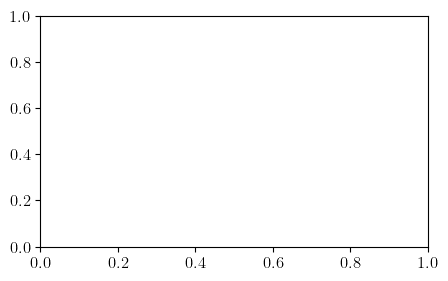

In [36]:
""" Plot the decay rate extrapolation lines """

fig, ax = plt.subplots(1, 1, figsize=(5,3))
clr = ['black', 'blue', 'red']
shp = ['o', 'v', 's']
j = 0
for i in [0]:
    ax.errorbar(time_points[i][1:-1], np.log(Gamma_t_list[i][1:-1]), Gamma_t_errors_list[i][1:-1]/Gamma_t_list[i][1:-1], color=clr[j], fmt=shp[j], elinewidth=1,capsize=3)
    ax.errorbar([7500],[-10.5+j*0.3],[0],color=clr[j], fmt=shp[j], elinewidth=1,capsize=3)
    plt.text(8000,-10.55+j*0.3,r'$T=$'+f'{TempList[i]}',fontsize=13)
    ax.plot(t_l[i],log_Gamma_fit(t_l[i],log_Gamma_at_zero[i],slope[i]),color=clr[j],linewidth=0.5)
    j += 1
plt.xlabel(r'$t$',fontsize=16)
plt.xlim((0,11000))
plt.ylim((-11.7,-9.4))
ax.set_ylabel(r'$\ln\:\Gamma(t)$',fontsize=16)
#plt.savefig('Gamma(t).pdf')
beautify(ax, times=-100)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


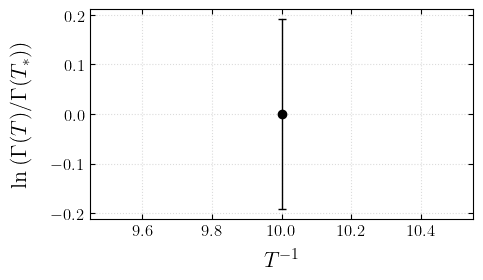

In [35]:
""" Plot the resulting fit """

Tinv = np.linspace(TempList[0]**(-1),TempList[-1]**(-1),1000)
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(Tinv, log_Gamma_th(Tinv,Es), 'black', linewidth=2)
ax.plot(Tinv, log_Gamma_th2(Tinv,log_A_th)-log_Gamma_th2(TempList[rf]**(-1),log_A_th), 'red', linestyle='dashed', linewidth=3)
plt.errorbar(np.array(TempList)**(-1), log_Gamma_at_zero-log_Gamma_at_zero[rf], np.sqrt(log_Gamma_at_zero_error**2+log_Gamma_at_zero_error[rf]**2)/2, color='black', fmt='o', elinewidth=1, capsize=3)
plt.xlabel(r'$T^{-1}$',fontsize=16)
ax.set_ylabel(r'$\ln\: (\Gamma(T)/\Gamma(T_*))$',fontsize=16)
#plt.text(10.6,0.52,r'$E_s^{(exp)}=1.329\pm 0.087$',fontsize=14)
#plt.savefig('E_sph1.pdf')
beautify(ax, times=-100)
plt.tight_layout()
plt.show()